In [ ]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
def estimate_projection_matrix(world_points, image_points):
    """Calcule la matrice de projection (DLT) à partir de points 3D → 2D"""
    N = world_points.shape[0]
    A = []
    for i in range(N):
        X, Y, Z = world_points[i]
        u, v = image_points[i]
        A.append([X, Y, Z, 1, 0, 0, 0, 0, -u*X, -u*Y, -u*Z, -u])
        A.append([0, 0, 0, 0, X, Y, Z, 1, -v*X, -v*Y, -v*Z, -v])
    A = np.array(A)
    _, _, Vt = np.linalg.svd(A)
    P = Vt[-1].reshape(3, 4)
    return P / P[-1, -1]

def triangulate_point(P1, P2, pt1, pt2):
    """Reconstruit un point 3D à partir de ses projections dans deux caméras"""
    u1, v1 = pt1
    u2, v2 = pt2
    A = np.array([
        u1*P1[2] - P1[0],
        v1*P1[2] - P1[1],
        u2*P2[2] - P2[0],
        v2*P2[2] - P2[1]
    ])
    _, _, Vt = np.linalg.svd(A)
    X = Vt[-1]
    X = X / X[3]  # homogénéisation
    return X[:3]


In [49]:
world_points = np.array([[0,0,0.000001],[5/2,0,0.000001],[5/2,5/2,-0.00000001],[0,5/2,0],[-5/2,5/2,0],[-5/2,0,0],[-5/2,-5/2,0],[0,-5/2,0],[5/2,-5/2,0],[0,0,2.08]])

image_intersections_left = np.array([[698, 563],
 [499, 566],
 [444, 765],
 [696, 760],
 [955, 756],
 [957, 561],
 [958, 377],
 [699, 381],
 [454, 386],
 
 [696,372]
 ])
image_intersections_right = np.array([[673, 477],
 [957, 480],
 [959, 265],
 [681, 260],
 [386, 255],
 [376, 475],
 [367, 692],
 [666, 691],
 [955, 691],
 
 
 [662,265]
 ])

# image_points_left = [[834,473],[580,473],[574,666]]
# image_points_right = [[517,584],[810,586],[819,362]]

image_points_left = [[575,412],[750,130]]
image_points_right = [[515,462],[818,286]]


In [50]:
# Z0 = 0
# world_pts = np.array([
#     [0, 0, Z0+0.00001],
#     [5, 0, Z0-0.00001],
#     [0, 5, Z0],
#     [-5, 0, Z0],
#     [0, -5, Z0],
#     [5, 5, Z0], 
#     [-5, -5, Z0],   
# ])

# # Projection camera 1
# img1_pts = np.vstack((pd.read_csv(r'C:\Users\apelosse\Documents\Drop_oscillation\Drying\Analyse\Alec\2025-06-09-40uL_250um\calibration_left.csv')['X'],
#             pd.read_csv(r'C:\Users\apelosse\Documents\Drop_oscillation\Drying\Analyse\Alec\2025-06-09-40uL_250um\calibration_left.csv')['Y'])).T

# # Projections camera 2
# img2_pts = np.vstack((pd.read_csv(r'C:\Users\apelosse\Documents\Drop_oscillation\Drying\Analyse\Alec\2025-06-09-40uL_250um\calibration_right.csv')['X'],
#             pd.read_csv(r'C:\Users\apelosse\Documents\Drop_oscillation\Drying\Analyse\Alec\2025-06-09-40uL_250um\calibration_right.csv')['Y'])).T

# # Estimation of projection matrices
# P1 = estimate_projection_matrix(world_pts, img1_pts)
# P2 = estimate_projection_matrix(world_pts, img2_pts)

# TBD coordinates
pt_img1 = [[6.633, 3.267], [4.412, 3.279], [4.396, 5.479], [9.929, 2.212]]
pt_img2 = [[4.046, 5.612], [6.800, 5.483], [6.679, 2.796], [0.046, 7.096]]


# # Reconstruction 3D
# pt_3D=[]
# for k in range(len(pt_img2)):
#     pt_3D.append(triangulate_point(P1, P2, pt_img1[k], pt_img2[k]))
#     print('X = {:.2f} mm, Y = {:.2f} mm, Z = {:.2f} mm'.format(pt_3D[-1][0], pt_3D[-1][1], pt_3D[-1][2]))

# Estimation of projection matrices
print(image_intersections_left)
P1 = estimate_projection_matrix(world_points, image_intersections_left)
P2 = estimate_projection_matrix(world_points, image_intersections_right)



# Reconstruction 3D
pt_3D=[]
for k in range(len(image_points_right)):
    pt_3D.append(triangulate_point(P1, P2, image_points_left[k], image_points_right[k]))
    print('X = {:.5f} mm, Y = {:.5f} mm, Z = {:.5f} mm'.format(pt_3D[-1][0], pt_3D[-1][1], pt_3D[-1][2]))

[[698 563]
 [499 566]
 [444 765]
 [696 760]
 [955 756]
 [957 561]
 [958 377]
 [699 381]
 [454 386]
 [696 372]]
[[698 563]
 [499 566]
 [444 765]
 [696 760]
 [955 756]
 [957 561]
 [958 377]
 [699 381]
 [454 386]
 [696 372]]
[[698 563]
 [499 566]
 [444 765]
 [696 760]
 [955 756]
 [957 561]
 [958 377]
 [699 381]
 [454 386]
 [696 372]]
[[698 563]
 [499 566]
 [444 765]
 [696 760]
 [955 756]
 [957 561]
 [958 377]
 [699 381]
 [454 386]
 [696 372]]
[[698 563]
 [499 566]
 [444 765]
 [696 760]
 [955 756]
 [957 561]
 [958 377]
 [699 381]
 [454 386]
 [696 372]]
[[698 563]
 [499 566]
 [444 765]
 [696 760]
 [955 756]
 [957 561]
 [958 377]
 [699 381]
 [454 386]
 [696 372]]
[[698 563]
 [499 566]
 [444 765]
 [696 760]
 [955 756]
 [957 561]
 [958 377]
 [699 381]
 [454 386]
 [696 372]]
[[698 563]
 [499 566]
 [444 765]
 [696 760]
 [955 756]
 [957 561]
 [958 377]
 [699 381]
 [454 386]
 [696 372]]
[[698 563]
 [499 566]
 [444 765]
 [696 760]
 [955 756]
 [957 561]
 [958 377]
 [699 381]
 [454 386]
 [696 372]]
[

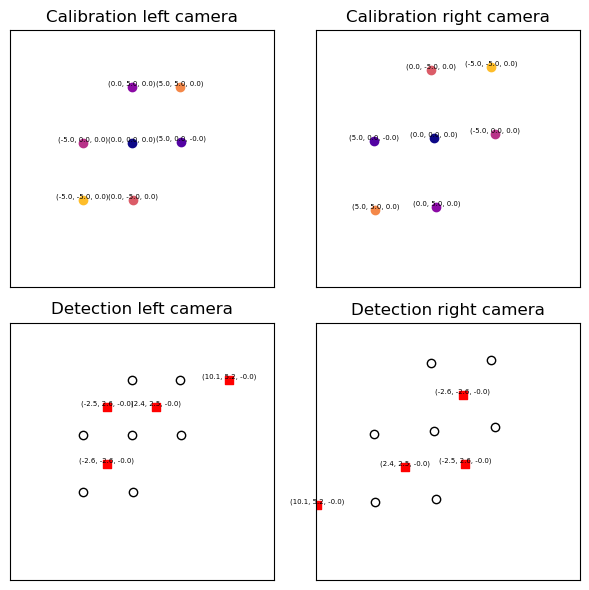

In [124]:
plt.figure(figsize = (6,6))
plt.subplot(221)
for k in range(len(img1_pts)):
    plt.scatter(img1_pts[k,0], img1_pts[k,1], color = plt.get_cmap('plasma')(k/len(img1_pts)))
    plt.text(img1_pts[k,0], img1_pts[k,1],'({:.1f}, {:.1f}, {:.1f})'.format((world_pts[k][0]), (world_pts[k][1]), (world_pts[k][2])),
             fontsize = 5, va = 'bottom', ha = 'center')
plt.xlim(0,12)
plt.ylim(10,0)
plt.xticks([])
plt.yticks([])
plt.title('Calibration left camera')
plt.subplot(222)
for k in range(len(img2_pts)):
    plt.scatter(img2_pts[k,0], img2_pts[k,1], color = plt.get_cmap('plasma')(k/len(img2_pts)))
    plt.text(img2_pts[k,0], img2_pts[k,1],'({:.1f}, {:.1f}, {:.1f})'.format((world_pts[k][0]), (world_pts[k][1]), (world_pts[k][2])),
             fontsize = 5, va = 'bottom', ha = 'center')
plt.xlim(0,12)
plt.ylim(10,0)
plt.xticks([])
plt.yticks([])
plt.title('Calibration right camera')
plt.subplot(223)
for k in range(len(img1_pts)):
    plt.scatter(img1_pts[k,0], img1_pts[k,1], color = 'w', edgecolor = 'k')
for k in range(len(pt_img1)):
    plt.scatter(pt_img1[k][0], pt_img1[k][1], color = 'r', marker ='s')
    plt.text(pt_img1[k][0], pt_img1[k][1],'({:.1f}, {:.1f}, {:.1f})'.format((pt_3D[k][0]), (pt_3D[k][1]), (pt_3D[k][2])),
             fontsize = 5, va = 'bottom', ha = 'center')
plt.xlim(0,12)
plt.ylim(10,0)
plt.xticks([])
plt.yticks([])
plt.title('Detection left camera')
plt.subplot(224)
for k in range(len(img2_pts)):
    plt.scatter(img2_pts[k,0], img2_pts[k,1], color = 'w', edgecolor = 'k')
for k in range(len(pt_img2)):
    plt.scatter(pt_img2[k][0], pt_img2[k][1], color = 'r', marker ='s')
    plt.text(pt_img2[k][0], pt_img2[k][1],'({:.1f}, {:.1f}, {:.1f})'.format((pt_3D[k][0]), (pt_3D[k][1]), (pt_3D[k][2])),
             fontsize = 5, va = 'bottom', ha = 'center')
plt.xlim(0,12)
plt.ylim(10,0)
plt.xticks([])
plt.yticks([])
plt.title('Detection right camera')
plt.tight_layout()


In [106]:
k

0

In [44]:
world_pts = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 1, 0],
    [1, 0, 1],   
])

# Projection camera 1
img1_pts = np.array([
    [0,0],
    [1,0],
    [0,1],
    [0,0],
    [1,1],
    [1,0],
])

# Projections camera 2
img2_pts = np.array([
    [0,0],
    [1,0],
    [0,0],
    [0,1],
    [1,0],
    [1,1],
])

# Estimation of projection matrices
P1 = estimate_projection_matrix(world_pts, img1_pts)
P2 = estimate_projection_matrix(world_pts, img2_pts)

# TBD coordinates
pt_img1 = [0.5, 0.5]
pt_img2 = [0.5,0]

# Reconstruction 3D
pt_3D = triangulate_point(P1, P2, pt_img1, pt_img2)
print(pt_3D)


[[ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  1  0  0  0  0 -1  0  0 -1]
 [ 0  0  0  0  1  0  0  1  0  0  0  0]
 [ 0  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  1  0 -1  0 -1]
 [ 0  0  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  0  0  0  0]
 [ 1  1  0  1  0  0  0  0 -1 -1  0 -1]
 [ 0  0  0  0  1  1  0  1 -1 -1  0 -1]
 [ 1  0  1  1  0  0  0  0 -1  0 -1 -1]
 [ 0  0  0  0  1  0  1  1  0  0  0  0]]
[[ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  1  0  0  0  0 -1  0  0 -1]
 [ 0  0  0  0  1  0  0  1  0  0  0  0]
 [ 0  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  1  0  0  0  0]
 [ 0  0  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  0  0 -1 -1]
 [ 1  1  0  1  0  0  0  0 -1 -1  0 -1]
 [ 0  0  0  0  1  1  0  1  0  0  0  0]
 [ 1  0  1  1  0  0  0  0 -1  0 -1 -1]
 [ 0  0  0  0  1  0  1  1 -1  0 -1 -1]]
[ 5.00000000e-01  5.00000000e-01 -1.92163191e-18]


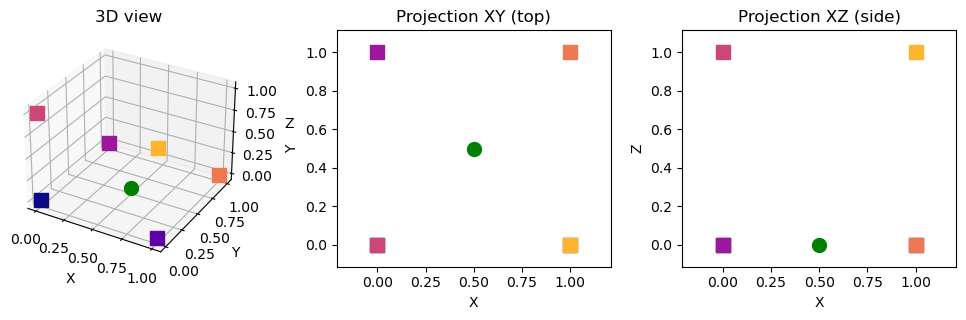

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,3.3))

ax1 = fig.add_subplot(1, 3, 1, projection='3d')
for k, point in enumerate(world_pts):
    ax1.scatter(point[0], point[1], point[2], color=plt.get_cmap('plasma')(k / 6), s=100, marker = 's')
ax1.scatter(pt_3D[0], pt_3D[1], pt_3D[2], color='g', s=100)
ax1.set_title("3D view")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax2 = fig.add_subplot(1, 3, 2)
for k, point in enumerate(world_pts):
    ax2.scatter(point[0], point[1], color=plt.get_cmap('plasma')(k / 6), s=100, marker = 's')
ax2.scatter(pt_3D[0], pt_3D[1], color='g', s=100)
ax2.set_title("Projection XY (top)")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.axis('equal')

ax3 = fig.add_subplot(1, 3, 3)
for k, point in enumerate(world_pts):
    ax3.scatter(point[0], point[2], color=plt.get_cmap('plasma')(k / 6), s=100, marker = 's')
ax3.scatter(pt_3D[0], pt_3D[2], color='g', s=100)
ax3.set_title("Projection XZ (side)")
ax3.set_xlabel('X')
ax3.set_ylabel('Z')
ax3.axis('equal')

plt.tight_layout()
plt.show()